In [30]:
from helper import read_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

type(read_data)

function

In [2]:
TRAIN_FILE_PATH = "./asset/training_data.txt"

VOWELS_TABLE = """\
|   AA  |   ɑ   |
|   AE  |   æ   |
|   AH  |   ʌ   |
|   AO  |   ɔ   |
|   AW  |   aʊ  |
|   AY  |   aɪ  |
|   EH  |   ɛ   |
|   ER  |   ɜːr |
|   EY  |   eɪ  |
|   IH  |   ɪ   |
|   IY  |   i   |
|   OW  |   oʊ  |
|   OY  |   ɔɪ  |
|   UH  |   ʊ   |
|   UW  |   u   |
"""

CONSONANT_TABLE = """\
|     P     |  p  |
|     S     |  s  |
|     B     |  b  |
|     SH    |  ʃ  |
|     CH    |  tʃ |
|     T     |  t  |
|     D     |  d  |
|     TH    |  θ  |
|     DH    |  ð  |
|     V     |  v  |
|     F     |  f  |
|     W     |  w  |
|     G     |  g  |
|     Y     |  j  |
|     HH    |  h  |
|     Z     |  z  |
|     JH    |  dʒ |
|     ZH    |  ʒ  |
|     K     |  k  |
|     L     |  l  |
|     M     |  m  |
|     N     |  n  |
|     NG    |  ŋ  |
|     R     |  r  |
"""


In [3]:
def init_phonemes(phonemes_table):
    ans = {}
    phonemes_list = list(filter(lambda x: not x in "\n",
                              phonemes_table.replace(" ", "").split("|")))
    for x in range(0, len(phonemes_list), 2):
        ans[phonemes_list[x]] =  phonemes_list[x+1]
    return ans

train_data = read_data(TRAIN_FILE_PATH)

vowels_dict = init_phonemes(VOWELS_TABLE)
consonants_dict = init_phonemes(CONSONANT_TABLE)

In [4]:
def contain_phonemes(phoneme, phonemes_dict):
    return phoneme in phonemes_dict

def count_contain_phonemes_num(phonemes_list, phonemes_dict):
    return len(list(filter(lambda phoneme:contain_phonemes(phoneme, phonemes_dict), phonemes_list)))

def get_world(line):
    return line.split(":")[0]

def has_number(string):
    return any(char.isdigit() for char in string)

def get_stress_index(vowels_list):
    return [i + 1 for i, x in enumerate(vowels_list) if "1" in x][0]
    
    
def get_data(line):
    line = line.split(":")[1]
    phonemes_list = line.split(" ")
    vowels_list = list(filter(lambda phoneme: has_number(phoneme), phonemes_list))
    constants_list = list(filter(lambda phoneme: not has_number(phoneme), phonemes_list))
    # print(count_contain_phonemes_num(constants_list, consonants_dict))
    return [get_stress_index(vowels_list), len(vowels_list), len(constants_list)]

In [11]:
df = pd.DataFrame([get_data(line) for line in train_data], 
                  index=[get_world(line) for line in train_data],
                  columns=["stress_index", "vowels_size", "constans_size"])
df.head()

,stress_index,vowels_size,constans_size
COED,1,2,2
PURVIEW,1,2,3
HEHIR,1,2,3
MUSCLING,1,3,4
NONPOISONOUS,2,4,6


In [12]:
df.describe()

,stress_index,vowels_size,constans_size
count,50000.000000,50000.000000,50000.000000
mean,1.364080,2.567340,3.922160
std,0.595326,0.696358,1.310563
min,1.000000,2.000000,0.000000
25%,1.000000,2.000000,3.000000
50%,1.000000,2.000000,4.000000
75%,2.000000,3.000000,5.000000
max,4.000000,4.000000,10.000000


In [13]:
df[(df["vowels_size"] == 1) | (df["vowels_size"] == 5)].size

0

In [14]:
df.groupby(['vowels_size', 'stress_index']).agg(
    {'constans_size':'count'}).groupby(level=0).apply(lambda x : 
                                                      x * 100 / float(x.sum())).add_suffix('_Count').reset_index().columns[1]

'stress_index'

vowels_size
2    [Axes(0.125,0.125;0.775x0.755)]
3    [Axes(0.125,0.125;0.775x0.755)]
4    [Axes(0.125,0.125;0.775x0.755)]
dtype: object

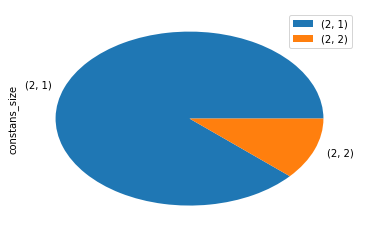

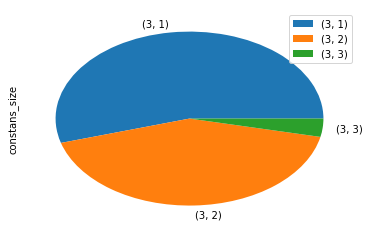

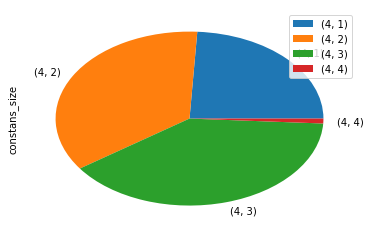

In [15]:
df.groupby(['vowels_size', 'stress_index']).agg(
    {'constans_size':'count'}).groupby(level=0).apply(lambda x : 
                                 
                                                      x * 100 / float(x.sum())).groupby("vowels_size").plot.pie(subplots=True)

## Decistion Tree

In [22]:
df.corr().stress_index.to_frame().sort_values(by='stress_index', ascending=False)

,stress_index
stress_index,1.000000
vowels_size,0.564520
constans_size,0.216817


In [52]:
feature_list=["vowels_size", "constans_size"]

train, test = train_test_split(df, test_size=0.2)

x_train = train[feature_list]
y_train = train.stress_index
x_test = test[feature_list]
y_test = test.stress_index

clf = DecisionTreeClassifier(criterion = "gini")
dtree = clf.fit(x_train, y_train)
dtree.score(x_test, y_test)

0.71960000000000002

0.70960000000000001